In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

C:\Users\Varad\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the data
data_taken = pd.read_csv("Datasets/dataset_Copy.csv")
print(data_taken.head())

   label      cl1      cl2      cl3      cl4      cl5      cl6      cl7  \
0      0 -0.15256 -0.18260 -0.21046 -0.17843 -0.15295 -0.18675 -0.20970   
1      0  0.81460  0.91668  0.99092  0.99092  0.99092  0.99092  0.99136   
2      0  0.49070  0.45079  0.40279  0.29840  0.23562  0.23562  0.23688   
3      0  0.21846  0.16398  0.11329  0.11329  0.11329  0.11329  0.11485   
4      0  0.38019  0.34004  0.30267  0.30267  0.30267  0.30267  0.30267   

       cl8      cl9    ...       cl491    cl492    cl493    cl494    cl495  \
0 -0.17432 -0.15406    ...     0.42617  0.42749  0.42749  0.47871  0.59030   
1  1.01510  1.06120    ...    -3.34280 -4.15830 -4.57750 -5.00520 -5.29190   
2  0.28875  0.32065    ...    -0.37281 -0.25422 -0.11002 -0.16828 -0.27202   
3  0.17900  0.21661    ...    -0.47329  0.45015  0.93955  0.77506  0.44745   
4  0.30267  0.30267    ...     0.29959  0.24987  0.15163  0.14762  0.14762   

      cl496     cl497     cl498     cl499     cl500  
0  0.659950  0.713680  0.7

1    30000
0    30000
Name: label, dtype: int64

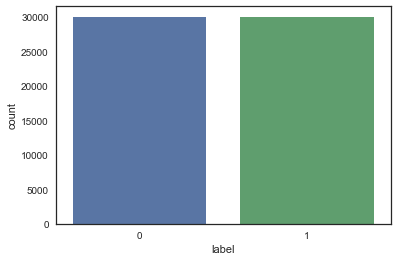

In [3]:
y = data_taken.label
X = data_taken.drop('label', axis=1)
g = sns.countplot(y)
y.value_counts()

In [4]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
59970    1
59971    1
59972    1
59973    1
59974    1
59975    1
59976    1
59977    1
59978    1
59979    1
59980    1
59981    1
59982    1
59983    1
59984    1
59985    1
59986    1
59987    1
59988    1
59989    1
59990    1
59991    1
59992    1
59993    1
59994    1
59995    1
59996    1
59997    1
59998    1
59999    1
Name: label, Length: 60000, dtype: int64

In [5]:
X

,cl1,cl2,cl3,cl4,cl5,cl6,cl7,cl8,cl9,cl10,...,cl491,cl492,cl493,cl494,cl495,cl496,cl497,cl498,cl499,cl500
0,-0.152560,-0.182600,-0.210460,-0.178430,-0.152950,-0.186750,-0.209700,-0.174320,-0.154060,-0.190810,...,0.426170,0.427490,0.427490,0.478710,0.590300,0.659950,0.713680,0.743660,0.773480,0.849310
1,0.814600,0.916680,0.990920,0.990920,0.990920,0.990920,0.991360,1.015100,1.061200,1.174200,...,-3.342800,-4.158300,-4.577500,-5.005200,-5.291900,-4.891200,-3.965800,-3.050200,-2.104600,-1.283300
2,0.490700,0.450790,0.402790,0.298400,0.235620,0.235620,0.236880,0.288750,0.320650,0.320650,...,-0.372810,-0.254220,-0.110020,-0.168280,-0.272020,-0.204740,-0.105620,-0.104480,-0.104480,-0.073866
3,0.218460,0.163980,0.113290,0.113290,0.113290,0.113290,0.114850,0.179000,0.216610,0.164340,...,-0.473290,0.450150,0.939550,0.775060,0.447450,0.361440,0.323940,0.370540,0.428610,0.428790
4,0.380190,0.340040,0.302670,0.302670,0.302670,0.302670,0.302670,0.302670,0.302670,0.302670,...,0.299590,0.249870,0.151630,0.147620,0.147620,0.095191,-0.001893,-0.046843,-0.083106,-0.119630
5,-0.130700,-0.093764,-0.072983,-0.072983,-0.073755,-0.141040,-0.187930,-0.163270,-0.121670,-0.047385,...,-0.175680,-0.220610,-0.245350,-0.246120,-0.246120,-0.246120,-0.246120,-0.297620,-0.361360,-0.340770
6,0.358290,0.493760,0.599210,0.632980,0.644790,0.616930,0.599980,0.730010,0.919740,1.167000,...,-0.506420,-0.599840,-0.781570,-0.717250,-0.600610,-0.597780,-0.597780,-0.576460,-0.550060,-0.573020
7,0.130370,0.115490,0.091294,0.066703,0.054090,0.054090,0.054090,0.054090,0.053421,0.034465,...,-0.400560,-0.377610,-0.329280,-0.337760,-0.362520,-0.386370,-0.403420,-0.390980,-0.366390,-0.342190
8,1.670300,1.644200,1.619900,1.619900,1.618500,1.491000,1.357800,1.313300,1.245400,1.013400,...,-0.698110,-0.689650,-0.656910,-0.630640,-0.604800,-0.573480,-0.550910,-0.550680,-0.550680,-0.486930
9,0.066110,-0.046800,-0.131120,-0.099990,-0.074840,-0.074840,-0.075685,-0.115680,-0.168230,-0.223080,...,-0.162770,-0.169010,-0.186870,-0.166450,-0.132050,-0.154360,-0.187220,-0.187600,-0.187600,-0.174010


In [6]:
# Check the data
X.isnull().any().describe

<bound method NDFrame.describe of cl1      False
cl2      False
cl3      False
cl4      False
cl5      False
cl6      False
cl7      False
cl8      False
cl9      False
cl10     False
cl11     False
cl12     False
cl13     False
cl14     False
cl15     False
cl16     False
cl17     False
cl18     False
cl19     False
cl20     False
cl21     False
cl22     False
cl23     False
cl24     False
cl25     False
cl26     False
cl27     False
cl28     False
cl29     False
cl30     False
         ...  
cl471    False
cl472    False
cl473    False
cl474    False
cl475    False
cl476    False
cl477    False
cl478    False
cl479    False
cl480    False
cl481    False
cl482    False
cl483    False
cl484    False
cl485    False
cl486    False
cl487    False
cl488    False
cl489    False
cl490    False
cl491    False
cl492    False
cl493    False
cl494    False
cl495    False
cl496    False
cl497    False
cl498    False
cl499    False
cl500    False
Length: 500, dtype: bool>

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.5,random_state=2)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)
print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

            cl1      cl2       cl3       cl4       cl5       cl6      cl7  \
9996  -0.283840 -0.31571 -0.345320 -0.322230 -0.279620 -0.213700 -0.15523   
57432  0.849660  0.91628  0.997720  1.005100  1.042100  1.034700  1.03470   
6744   0.145620  0.17939  0.195160  0.167760  0.146360  0.216950  0.30302   
55126  0.071549  0.13258  0.132580  0.181400  0.218010  0.291250  0.34007   
41565  0.139720  0.00014  0.035035  0.035035 -0.034756  0.035035 -0.20923   

           cl8       cl9      cl10    ...        cl491     cl492     cl493  \
9996  -0.12799 -0.085125  0.072314    ...    -0.224740 -0.243250 -0.282240   
57432  1.04210  1.027300  1.056900    ...     0.227820  0.235220  0.235220   
6744   0.35914  0.399790  0.425440    ...    -0.549080 -0.549080 -0.549080   
55126  0.44992  0.449920  0.474330    ...    -0.001684  0.071549 -0.001684   
41565  0.10483  0.000140 -0.034756    ...     0.523570  0.558470  0.523570   

          cl494     cl495     cl496     cl497     cl498  

In [8]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test/255.0

In [9]:
X_test.shape

(30000, 500)

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,500,1)
X_test = X_test.values.reshape(-1,500,1)

In [11]:
X_train.shape

(30000, 500, 1)

In [12]:
# Set the random seed
random_seed = 2

In [13]:
# Split the train and the validation set for the fitting
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [14]:
X_train.shape

(30000, 500, 1)

In [15]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 2)

In [16]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_test = to_categorical(Y_test, num_classes = 2)

In [17]:
from keras.layers import LeakyReLU

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv1D(filters = 5, kernel_size = 5, strides = 1, input_shape = (500,1)))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Conv1D(filters = 5, kernel_size = 5, strides = 1))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Conv1D(filters = 10, kernel_size = 3, strides = 1))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Conv1D(filters = 10, kernel_size = 3, strides = 1))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(40))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(20))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(2, activation = "softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 496, 5)            30        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 496, 5)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 248, 5)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 244, 5)            130       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 244, 5)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 122, 5)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 120, 10)           160       
__________

In [18]:
X_train.shape

(30000, 500, 1)

In [19]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [20]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=0, factor=0.5, min_lr=0.00001)

In [21]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 100

In [22]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [23]:
X_train.shape

(30000, 500, 1)

In [24]:
# Without data augmentation i obtained an accuracy of 0.98114
model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_test, Y_test), verbose = 0)
              

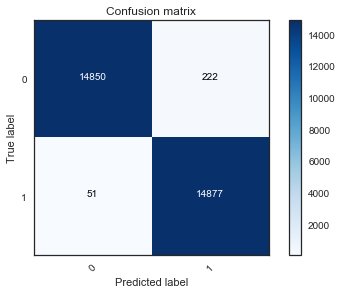

In [25]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

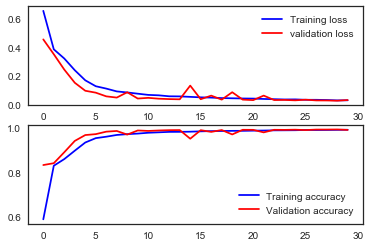

In [26]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)